# **Важно!**

* Домашнее задание состоит из нескольких задач, которые вам нужно решить.
*   Баллы выставляются по принципу «выполнено/невыполнено».
*   За каждую выполненную задачу вы получаете баллы (количество баллов за задание указано в скобках).

**Инструкция:** выполните задания в этом же ноутбуке (места под решения **каждой** задачи обозначаются как **#НАЧАЛО ВАШЕГО РЕШЕНИЯ** и **#КОНЕЦ ВАШЕГО РЕШЕНИЯ**).

**Как отправить задание на проверку:** вам необходимо сохранить решение в данном блокноте и отправить итоговый **файл .IPYNB** на учебной платформе в **стандартную форму сдачи домашнего задания.**

**Сроки проверки:** преподаватель проверит домашнее задание в течение недели после дедлайна и даст вам обратную связь.

# **Перед выполнением задания**

1. **Перезапустите ядро (restart the kernel):** в меню выбрать **Ядро (Kernel)**
→ **Перезапустить (Restart).**
2. **Выполните** **все ячейки (run all cells)**: в меню выбрать **Ячейка (Cell)**
→ **Запустить все (Run All)**.

После ячеек с заданием следуют ячейки с проверкой **с помощью assert**: если в коде есть ошибки, assert выведет уведомление об ошибке; если в коде нет ошибок, assert отработает без вывода дополнительной информации.

---

# Домашнее задание 3. Линейная регрессия. Градиентный спуск для обучения дифференцируемых моделей машинного обучения. Методы регуляризации моделей машинного обучения

**Цели:**

* Реализовать алгоритм линейной регрессии с помощью NumPy.

* Реализовать алгоритм градиентного спуска на примере функционала ошибки Хьюбера с одним оптимизируемым параметром.

* Научиться работать с готовой библиотекой линейной регрессии.

In [5]:
# Запустите эту ячейку для первоначальной настройки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(21)
plt.style.use('fivethirtyeight')
plt.rc('lines', linewidth=2)

## Часть 1. Алгоритм линейной регрессии

**Линейная регрессия** — это метод машинного обучения, который используется для прогнозирования числовых значений на основе входных данных. В этом методе используется линейная комбинация входных переменных, чтобы получить выходное значение.

**Градиентный спуск** — это метод оптимизации, который используется для нахождения минимума функции путем итеративного изменения параметров функции в направлении наискорейшего убывания градиента.

В данном примере мы рассмотрим линейную регрессию с нуля с градиентным спуском с использованием библиотеки NumPy.

Задачи:
- реализовать аналитическое решение задачи линейной регрессии;
- реализовать функцию вычисления градиента и сохранения истории обучения.

**Задание 1 (1 балл)**

Реализуйте аналитическое решение задачи линейной регрессии в векторной форме:

$w = (X^\top X)^{-1} X^\top y$

Для обращения матрицы используйте функцию `np.linalg.inv()`. Для вычисления скалярного произведения можно воспользоваться функциями `np.dot()` или символом `@` (начиная с версии Python 3.5).

In [8]:
def linear_regression_analytical_solution(X, y):
    """
    Вычисляет аналитическое решение линейной регрессии в векторной форме.

    Args:
      X: Матрица признаков (n x m), где n — количество образцов, m — количество признаков.
      y: Вектор целевых значений (n x 1).

    Returns:
      w: Вектор весов модели (m x 1).
    """
    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    # КОНЕЦ ВАШЕГО РЕШЕНИЯ
    return w

Теперь создадим синтетический набор данных, на котором покажем, как работает наш код. Для этого мы используем функцию [`make_regression`](https://scikit-learn.org/dev/modules/generated/sklearn.datasets.make_regression.html) из библиотеки `sklearn` для генерации синтетических данных. Наши данные будут иметь единственный признак, чтобы их можно было легко визуализировать.

**Задание 2 (1 балл)**

Дополните код.
По аналогии с Домашним заданием 2 примените данные на обучающую (70%) и тестовую (30%) выборки. Используйте `linear_regression_analytical_solution()` для расчета весов на обучающей выборке, затем используйте эти веса для вычисления предсказаний `y_pred` на тестовой выборке.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

# Создаем синтетический датасет
# Фиксируем случайное число для воспроизводимости
X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=21)
# Добавляем столбец единиц для свободного члена
X_b = np.c_[np.ones(X.shape), X]

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size = 0.3, random_state = 21)

w = linear_regression_analytical_solution(X_train, y_train)

y_pred = X_test @ w
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [11]:
assert X_train.shape == (70, 2)
assert y_test.shape == (30,)

**Задание 3 (1 балл)**

Постройте график рассеяния обучающей выборки, тестовой выборки, а также результаты предсказания (как `y_pred` зависит от `X_test`). Результаты предсказания должны располагаться вдоль прямой линии.

**Внимание!** Поскольку мы добавили единичный вектор к признакам, вам понадобится воспользоваться индексацией, чтобы выбрать одну из колонок в массиве X.

Чтобы график легче считывался, добавьте опцию label при построении plt.scatter:

`plt.scatter(X, y, label='Выборка А')`.

Затем отобразите названия с помощью функции легенды:

`plt.legend()`



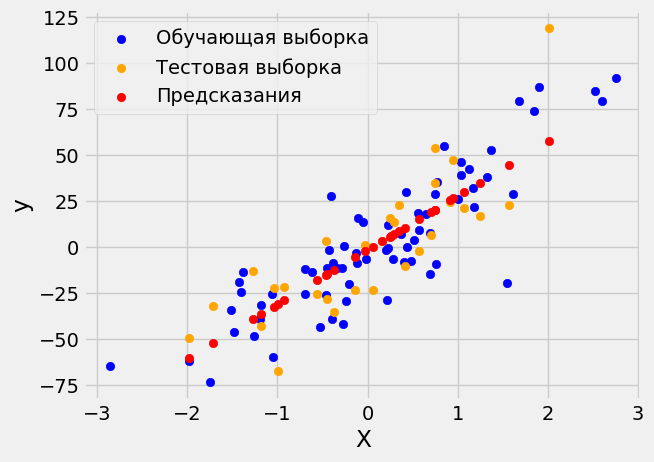

In [13]:
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
plt.scatter(X_train[:, 1], y_train, label = 'Обучающая выборка', color = 'blue')
plt.scatter(X_test[:, 1], y_test, label = 'Тестовая выборка', color = 'orange')
plt.scatter(X_test[:, 1], y_pred, label = 'Предсказания', color = 'red')
plt.xlabel('X')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

## Часть 2. Оптимизация функции потерь с помощью градиентного спуска

В тех ситуациях, когда аналитическое решение задачи линейной регрессии неприменимо, она может быть решена с помощью численных методов, позволяющих минимизировать разницу между предсказаниями и реальными значениями целевой переменной.

В этой части мы попробуем реализовать решение с помощью градиентного спуска, минимизируя среднеквадратичную ошибку (MSE).

**Задание 4 (1 балл)**

Реализуйте функцию для расчета среднеквадратичной функции потерь:

$\text{MSE} = \frac{1}{n} \| y - X \mathbf{w} \|^2$


In [16]:
def compute_cost(X, y, w):
    """
    Вычисляет значение функции потерь MAE (Mean Absolute Error).

    Args:
        X: Матрица признаков (n x m), где n — количество образцов, m — количество признаков.
        y: Вектор целевых значений (n x 1).
        w: Вектор весов модели (m x 1).

    Returns:
        cost: Значение функции потерь.
    """
    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    cost =  (np.sum((y - X @ w) ** 2)) / X.shape[0]
    # КОНЕЦ ВАШЕГО РЕШЕНИЯ
    return cost

In [17]:
# Тестовая выборка
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([7, 9, 11, 13])

assert compute_cost(X, y, np.array([1, 1])) == 6.0
assert compute_cost(X, y, np.array([0, 0])) == 105.0
assert compute_cost(X, y, np.array([1, 2])) == 36.0
assert compute_cost(X, y, np.array([-1, -1])) == 406.0

**Задание 5 (1 балл)**

Запишите функцию для вычисления градиента среднеквадратичной функции потерь:

$\frac{\partial \text{MSE}}{\partial \mathbf{w}} = -\frac{2}{n} X^\top (y - X \mathbf{w})$


In [19]:
def compute_gradient(X, y, w):
    """
    Вычисляет производную функции потерь MAE (Mean Absolute Error).

    Args:
        X: Матрица признаков (n x m), где n — количество образцов, m — количество признаков.
        y: Вектор целевых значений (n x 1).
        w: Вектор весов модели (m x 1).

    Returns:
        gradient: Вектор производной функции потерь по весам (m x 1).
    """
    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    gradient = (-2 / X.shape[0]) * X.T @ (y - (X @ w))
    # КОНЕЦ ВАШЕГО РЕШЕНИЯ
    return gradient

In [20]:
# Тестовая выборка
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([7, 9, 11, 13])

assert (compute_gradient(X, y, np.array([1, 1])) == np.array([2., 0.])).all()
assert (compute_gradient(X, y, np.array([0, 0])) == np.array([-90, -110])).all()
assert (compute_gradient(X, y, np.array([1, 2])) == np.array([52, 60])).all()
assert (compute_gradient(X, y, np.array([-1, -1])) == np.array([-182, -220])).all()

**Задание 6 (2 балла)**

Теперь мы можем использовать градиентный спуск для нахождения оптимальных значений параметров модели. Для этого будем итеративно обновлять значения параметров, используя градиент функции потерь. Реализуем это через функцию gradient_descent.

Вычислите длину `y` (можно воспользоваться `len()`) и сохраните эту длину в переменную `n`.

Создайте матрицу `cost_history` с помощью `np.zeros`, передав в `np.zeros` `iterations` в качестве параметра. Построение графика изменения функции потерь – неоценимый навык в сфере машинного обучения. Этот график помогает выявить проблемы с переобучением или недообучением модели, а также позволяет определить, когда модель достигла оптимальной производительности и дальнейшее обучение не приносит улучшений.

Обратите внимание, что функция `np.zeros()` принимает единственный параметр — кортеж:
`np.zeros((element1, element2))`.

Затем создайте цикл по итерациям. Во время каждой итерации выполните вычисление градиента, обновление значений весов, расчет функции потерь после обновления. Значения функции потерь сохраните в соответствующие массивы, пользуясь индексацией (например, `cost_history[i] = `).

In [22]:
def gradient_descent(X, y, w, learning_rate, iterations):
    """
    Вычисляет оптимальные значения параметров модели с использованием градиентного спуска.

    Аргументы:
        X: Матрица признаков (n x m), где n — количество образцов, m — количество признаков.
        y: Вектор целевых значений (n x 1).
        w: Вектор начальных значений весов модели (m x 1).
        learning_rate: Скорость обучения (float).

    Возвращает:
        w: Вектор оптимальных значений весов модели (m x 1).
        cost_history: Матрица истории ошибок на каждой итерации (iterations x 1).
    """

    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    n = len(y)

    cost_history = np.zeros(iterations)

    for i in range(iterations):
        grad = compute_gradient(X, y, w)

        w = w - learning_rate * grad 

        cost_history[i] = compute_cost(X, y, w)
        
    # КОНЕЦ ВАШЕГО РЕШЕНИЯ
    return w, cost_history

In [23]:
# Тестовая выборка
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([7, 9, 11, 13])
w = np.array([1, 1])
learning_rate = 0.01
iterations = 1000

# Тест 1
w, _ = gradient_descent(X, y, np.array([1, 1]), learning_rate, iterations)
assert np.allclose(w, np.array([-4.16145666,  5.29891835]))

# Тест 2
w, _ = gradient_descent(X, y, np.array([0, 0]), learning_rate, iterations)
assert np.allclose(w, np.array([-4.17495931,  5.31020751]))

# Тест 3
w, _ = gradient_descent(X, y, np.array([1, 2]), learning_rate, iterations)
assert np.allclose(w, np.array([-4.2303228 ,  5.35649532]))

# Тест 4
w = np.array([[-1], [-1]])
w, _ = gradient_descent(X, y, np.array([-1, -1]), learning_rate, iterations)
assert np.allclose(w, np.array([-4.18846195,  5.32149668]))

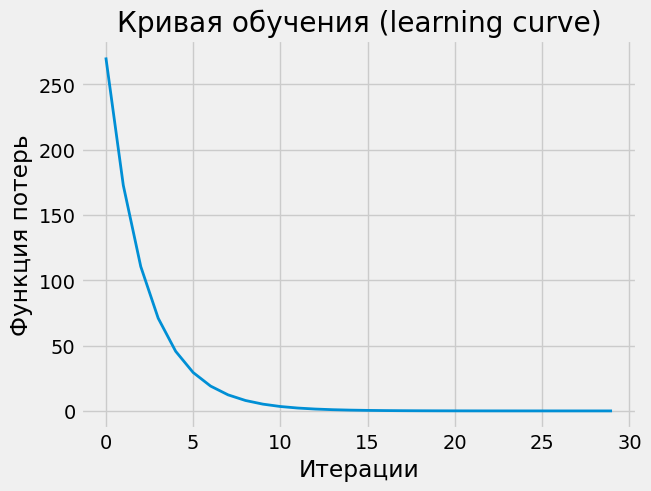

In [24]:
theta = np.random.randn(2,1) # Случайная инициализация весов

theta, cost_history = gradient_descent(X_b, y, theta, learning_rate=0.1, iterations=30)

plt.plot(range(len(cost_history)), cost_history)
plt.xlabel('Итерации')
plt.ylabel('Функция потерь')
plt.title('Кривая обучения (learning curve)')
plt.show()

Мы видим, что обучение прошло успешно, значение функционала ошибки снижается во время обучения.

## Часть 3. Обучение модели с помощью готовой библиотеки. Визуализация регуляризации

Мы будем использовать `LinearRegression` для обычной линейной регрессии, `Lasso` — для L1-регуляризации и `Ridge` — для L2-регуляризации из библиотеки `sklearn`.

**Задание 7 (1 балл)**

Воспользуйтесь функцией `LinearRegression`, чтобы построить модель линейной регрессии, и обучите ее на сгенерированных ранее данных. Получите предсказание модели `y_pred` для тестовой выборки и посчитайте значение MAE с использованием готовой функции `mean_absolute_error`. Запишите его в переменную `mae`.

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# НАЧАЛО ВАШЕГО РЕШЕНИЯ

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ
print(mae)

16.22857240781084


In [29]:
assert np.isclose(mae, 16.2, atol=0.1)

**Задание 8 (1 балл)**

В этом задании вам предлагается дополнить код, чтобы обучить модели Ridge и Lasso с разными значениями регуляризационного параметра `alpha`. Код для `Ridge` уже готов – от вас требуется дополнить его аналогичными строками для `Lasso`.

Мы сохраняем данные о величине ошибки предсказания. Это позволяет нам построить график зависимости среднеквадратичной ошибки от значений `alpha`.

График поможет вам проанализировать, как изменение силы регуляризации влияет на качество предсказаний моделей. Это важно для понимания баланса между переобучением и недообучением: низкие значения альфа могут привести к переобучению, а слишком высокие — к потере важных признаков. График также наглядно демонстрирует, как модели Ridge и Lasso по-разному реагируют на изменения регуляризации.

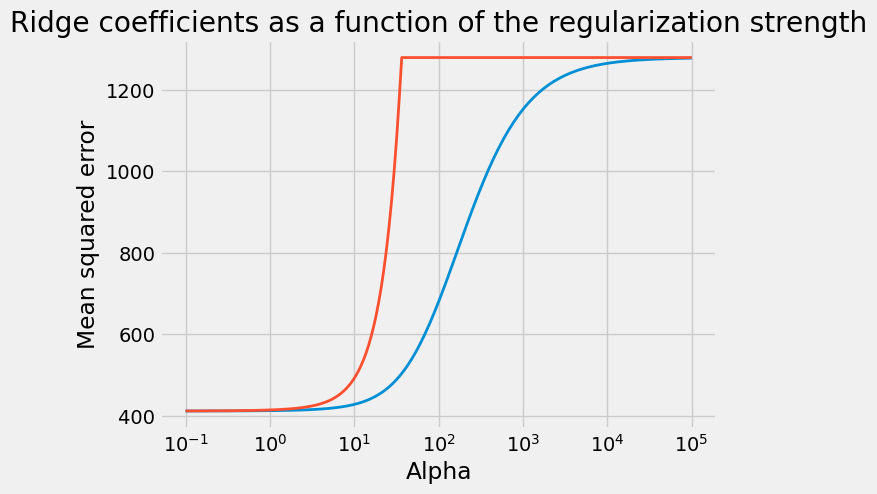

In [31]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Создайте экземпляр класса Lasso
ridge = Ridge()
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
lasso = Lasso()
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

# Задаем список тестируемых значений параметра регуляризации
alphas = np.logspace(-1, 5, 200)
errors_ridge = []
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
errors_lasso = []
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

# Обучаем модели с разными значениями параметра регуляризации альфа
for a in alphas:
    ridge.set_params(alpha=a).fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_test)
    errors_ridge.append(mean_squared_error(y_test, y_pred_ridge))
    # НАЧАЛО ВАШЕГО РЕШЕНИЯ
    lasso.set_params(alpha = a).fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_test)
    errors_lasso.append(mean_squared_error(y_test, y_pred_lasso))
    # КОНЕЦ ВАШЕГО РЕШЕНИЯ

fig, ax = plt.subplots()

# Переводим данные об ошибках в формат DataFrame
errors_ridge = pd.Series(errors_ridge, index=alphas, name="Mean squared error")
errors_ridge.plot()

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
errors_lasso = pd.Series(errors_lasso, index = alphas, name = "Lasso mean squared error")
errors_lasso.plot()
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

ax.set_xscale("log")
ax.set_xlabel("Alpha")
ax.set_ylabel("Mean squared error")
ax.set_title("Ridge coefficients as a function of the regularization strength")

plt.show()

## Часть 4. Работа с реальными данными. Визуализация мультиколлинеарности, построение матрицы корреляций

Код ниже загружает классический датасет California Housing, содержащий данные о домах в Калифорнии, включая такие характеристики, как средний доход жителей, возраст зданий, численность населения, расположение и средние цены на жилье.

Чтобы обнаружить линейную зависимость между признаками, которая может мешать обучению, мы строим тепловую карту матрицы корреляций, пользуясь библиотекой `seaborn`. Сама матрица рассчитывается с помощью функции `np.corrcoef`.

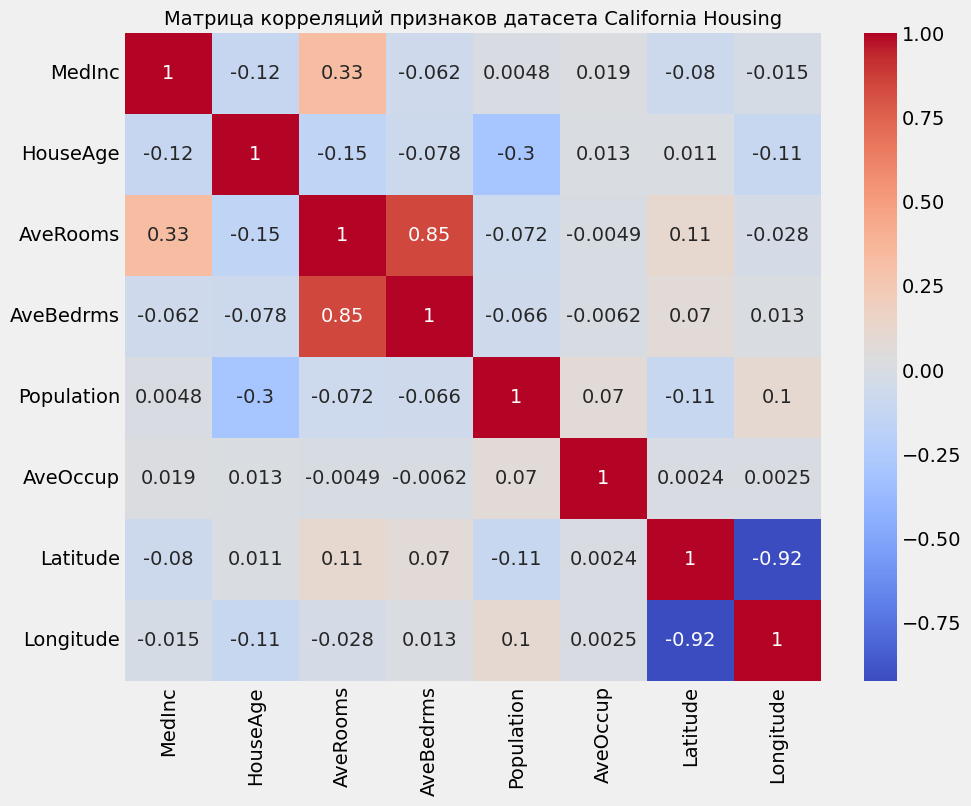

In [34]:
import seaborn as sns

from sklearn.datasets import fetch_california_housing

# Загружаем California housing датасет
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

# Рассчитываем матрицу корреляций
correlation_matrix = np.corrcoef(X, rowvar=False)

# Визуализируем матрицу корреляций в виде тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, xticklabels=feature_names, yticklabels=feature_names, cmap='coolwarm')
plt.title('Матрица корреляций признаков датасета California Housing', fontsize=14)
plt.show()

Мы видим сильную линейную зависимость между двумя парами признаков (Longitude/Latitude, обусловленная формой штата Калифорния, и AveBedrms/AveRoom, обусловленная здравым смыслом: чем больше спален, тем больше комнат).

Попробуем обучить модель линейной регрессии на этих данных без изменений.

**Задание 9 (1 балл)**

Нормируйте признаки, разбейте данные на обучающую и тестовую выборки с фиксированным `random_state=21` и обучите классическую модель LinearRegression. Рассчитайте значение mean absolute error для тестовой выборки. Сохраните значение в переменную `mae`.

In [36]:
from sklearn.preprocessing import StandardScaler

# НАЧАЛО ВАШЕГО РЕШЕНИЯ
from sklearn.metrics import mean_absolute_error

standard_scaler = StandardScaler()
standard_scaler.fit_transform(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21)

lr = LinearRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
# КОНЕЦ ВАШЕГО РЕШЕНИЯ

In [37]:
mae

0.5412640039905983

In [38]:
assert np.isclose(mae, 0.54, atol=0.01)

# Поздравляем!
В этом домашнем задании вы вручную реализовали алгоритм градиентного спуска для задач регрессии. Вы углубили навыки работы с данными формата pandas и NumPy. Построили первую кривую обучения, научились создавать синтетические данные при помощи функции `make_regression` и обучать модель линейной регрессии с и без регуляризации при помощи функций `LinearRegression`, `Ridge` и `Lasso` библиотеки `sklearn`. Мы также посмотрели, как происходит проверка на мультиколлинеарность на примере реальных данных.